<a href="https://colab.research.google.com/github/RohitJaiswal01/Credit_Card_Fraud_detection_ML_Classification./blob/main/Credit_Card_Fraud_detection_ML_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Credit Card Fraud Detection**

##### **Project Type**    - ML Classification
##### **Contribution**    - Individual
##### **Name** - **Rohit Jaiswal**

## GitHub Link
https://github.com/RohitJaiswal01/Credit_Card_Fraud_detection_ML_Classification.

## Dataset link
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

**Anonymized credit card transactions labeled as fraudulent or genuine**

## **Business Problem Overview**
For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.

It has been estimated by Nilson report that by 2020 the banking frauds would account to $30 billion worldwide. With the rise in digital payment channels, the number of fraudulent transactions is also increasing with new and different ways.

In the banking industry, credit card fraud detection using machine learning is not just a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees, and denials of legitimate transactions.

**About Dataset**  
**Context**    
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.  

**Context**    
The dataset contains transactions made by credit cards in September 2013 by European cardholders.  
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.  

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, **the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.** The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. **Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.**  



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression


from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Read the dataset**

In [3]:
# Reading the dataset
credit =pd.read_csv("/content/drive/MyDrive/ML projects/creditcard.csv")
# credit  = pd.read_csv('creditcard.csv')

# Making a copy so that original data don't get changed.
data = credit.copy()



#Exploratory data analysis

**Reading and understanding the data**

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Checking the shape of our data
data.shape

(284807, 31)

 **Check the data types of the columns**

In [6]:
# Check info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Check for missing values**

In [7]:
# Check if there are missing values.
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**Analyze Summary Statistics of the dataset**

In [8]:
# Analyze the summary statistics for numerical variables
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


Variable "Class" is dummy variable (1:Fraud; 0: No Fraud) Need to convert to categorical value.

In [9]:
data["Class"]=data["Class"].astype("category")

In [10]:
data["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [11]:
data["Class"].value_counts(normalize = True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

The categorical data between 1 (Fraud) and 0 (No Fraud) are extreamly inbalanced.
Fraud (1): 0.17%
No Fraud (0): 99.83%

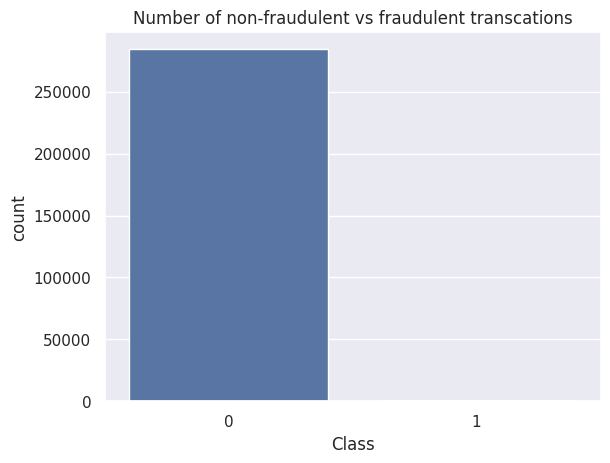

In [12]:
# Bar plot for the number of fraudulent vs non-fraudulent transcations
sns.countplot(x='Class', data=data)
plt.title('Number of non-fraudulent vs fraudulent transcations')
plt.show()

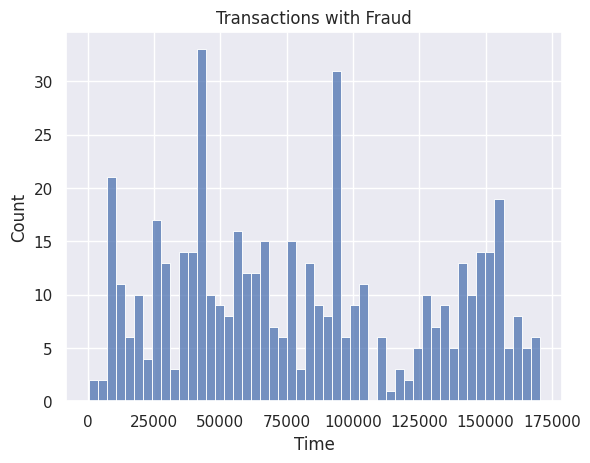

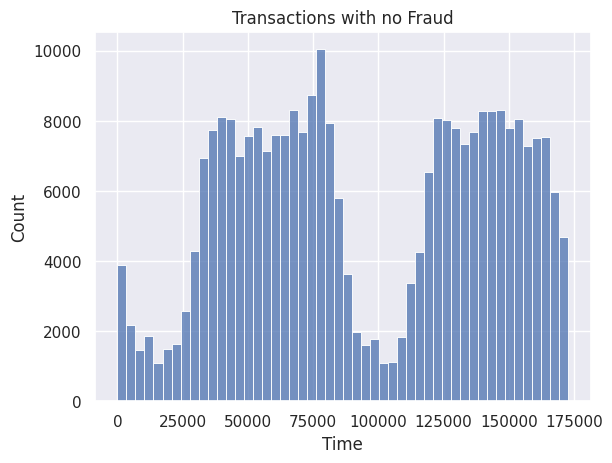

In [13]:
plot1 = sns.histplot(data["Time"][data.Class == 1], bins=50)
plot1.set_title("Transactions with Fraud")
plt.show()
plot1 = sns.histplot(data["Time"][data.Class == 0], bins=50)
plot1.set_title("Transactions with no Fraud")
plt.show()

In [14]:
# separating the data for analysis
no_fraud = data[data.Class == 0]
fraud = data[data.Class == 1]

In [15]:
print(no_fraud.shape)
print(fraud.shape)


(284315, 31)
(492, 31)


**Analysis**

We do not see any specific pattern for the fraudulent and non-fraudulent transctions with respect to Time.

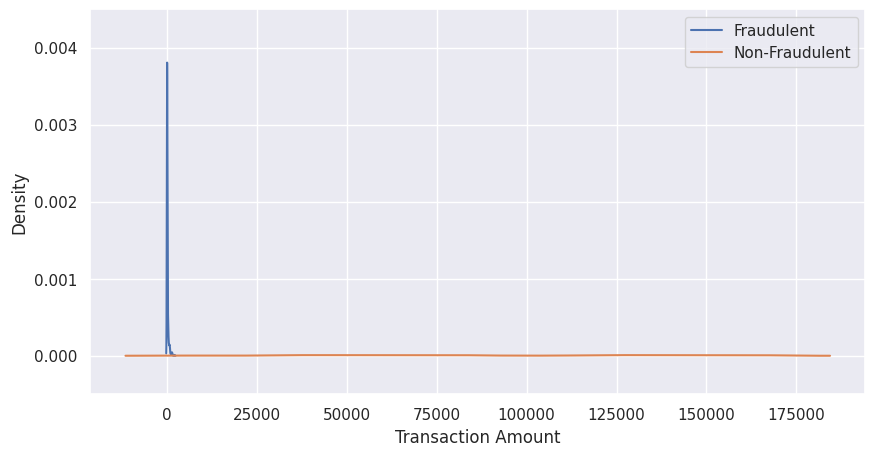

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

# Plot for fraudulent transactions with a specific color
sns.distplot(fraud['Amount'], label='Fraudulent', hist=False)

# Plot for non-fraudulent transactions with a different color
sns.distplot(no_fraud['Time'], label='Non-Fraudulent', hist=False)

# Set labels and y-axis limit
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.ylim(-0.0005, 0.0045)

# Add legend to specify the lines
plt.legend()

plt.show()


**Analysis**

We can see that the fraudulent transctions are mostly densed in the lower range of amount, whereas the non-fraudulent transctions are spreaded throughout low to high range of amount.

##**Splitting the data into 80% train and 20% test set**

In [22]:
# Putting feature variables into X
X = data.drop(['Class'], axis=1)

In [23]:
# Putting target variable to y
Y = data['Class']

In [24]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0, stratify = Y)

In [25]:
print("The shape of train dataset :")
print(X_train.shape)

print("\n The shape of test dataset :")
print(X_test.shape)

The shape of train dataset :
(227845, 30)

 The shape of test dataset :
(56962, 30)


In [26]:
print("Distribution of classes of dependent variable in train :")
print(Y_train.value_counts())

print("\n Distribution of classes of dependent variable in test :")
print(Y_test.value_counts())

Distribution of classes of dependent variable in train :
Class
0    227451
1       394
Name: count, dtype: int64

 Distribution of classes of dependent variable in test :
Class
0    56864
1       98
Name: count, dtype: int64


## **Feature Scaling**

We need to scale only the Amount column as all other columns are already scaled by the PCA transformation.

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
# Instantiate the Scaler
scaler = StandardScaler()

In [29]:
# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

## **Model building on imbalanced data**

**Metric selection for heavily imbalanced data**

As we have seen that the data is heavily imbalanced, where only 0.17% transctions are fraudulent, we should not consider Accuracy as a good measure for evaluating the model. Because in the case of all the datapoints return a particular class(1/0) irrespective of any prediction, still the model will result more than 99% Accuracy.

Hence, we have to measure the ROC-AUC score for fair evaluation of the model. The ROC curve is used to understand the strength of the model by evaluating the performance of the model at all the classification thresholds. The default threshold of 0.5 is not always the ideal threshold to find the best classification label of the test point. Because the ROC curve is measured at all thresholds, the best threshold would be one at which the TPR is high and FPR is low, i.e., misclassifications are low. After determining the optimal threshold, we can calculate the F1 score of the classifier to measure the precision and recall at the selected threshold.

## Logistic regression

In [30]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

In [31]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

**Tuning hyperparameter C**

C is the the inverse of regularization strength in Logistic Regression. Higher values of C correspond to less regularization.

In [32]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [33]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [34]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.148283,0.699157,0.041524,0.009248,0.01,{'C': 0.01},0.955677,0.964493,0.935495,0.897574,...,0.938171,0.023043,5,0.956336,0.953503,0.934497,0.952201,0.937169,0.946741,0.009046
1,5.181244,1.106840,0.058028,0.019086,0.1,{'C': 0.1},0.933823,0.970096,0.932125,0.902263,...,0.932274,0.021993,6,0.941440,0.938673,0.936491,0.946368,0.918798,0.936354,0.009378
2,5.652696,1.281338,0.055263,0.021089,1,{'C': 1},0.949014,0.967784,0.944865,0.900182,...,0.939065,0.022363,4,0.955465,0.953868,0.947618,0.950305,0.936227,0.948697,0.006809
3,5.030554,1.156655,0.043434,0.009574,10,{'C': 10},0.954864,0.968214,0.944380,0.914004,...,0.940751,0.020113,3,0.956042,0.952698,0.947146,0.944912,0.931984,0.946556,0.008284
4,5.322648,1.071284,0.049150,0.020886,100,{'C': 100},0.954823,0.966952,0.953047,0.928107,...,0.944861,0.017242,1,0.961977,0.943263,0.954357,0.964627,0.931856,0.951216,0.012195
5,5.831723,0.609775,0.059958,0.026704,1000,{'C': 1000},0.937495,0.965523,0.951096,0.896337,...,0.941560,0.024397,2,0.941951,0.945900,0.950372,0.951316,0.952156,0.948339,0.003855


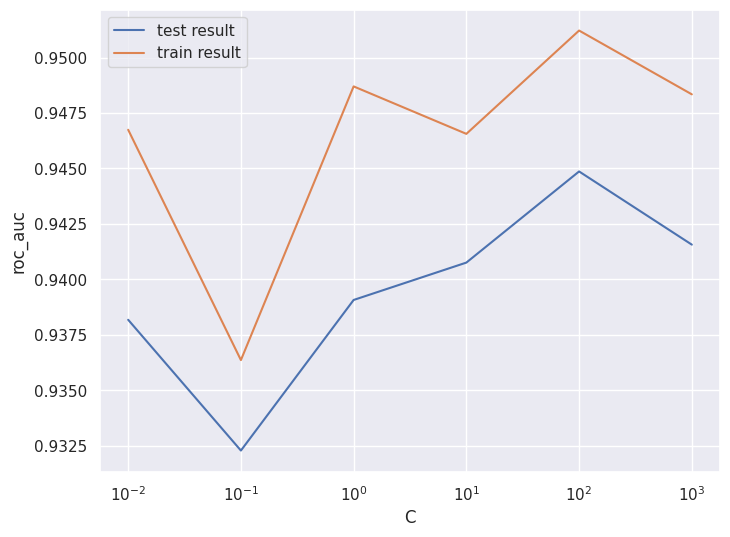

In [35]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [36]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9448612149811154 at C = 100


**Logistic regression with optimal C**

In [37]:
# Instantiate the model with best C
logistic_imb = LogisticRegression(C=100)

In [38]:
# Fit the model on the train set
logistic_imb_model = logistic_imb.fit(X_train, Y_train)

In [39]:
# Predictions on the train set
y_train_pred = logistic_imb_model.predict(X_train)

[[227348    103]
 [   116    278]]


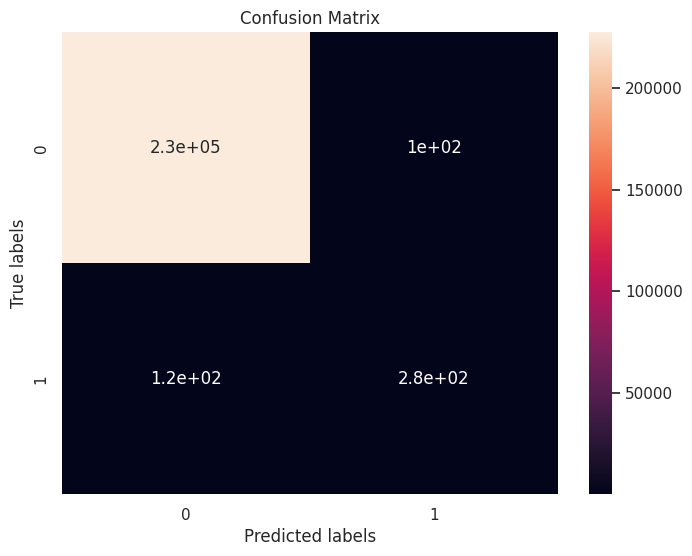

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


confusion = metrics.confusion_matrix(Y_train, y_train_pred)
print(confusion)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(Y_train, y_train_pred)
print(confusion)

[[227348    103]
 [   116    278]]


In [44]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [45]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(Y_train, y_train_pred))

# Sensitivity
print("Recall:-",TP / float(TP+FN))

# Specificity
print("Precision:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(Y_train, y_train_pred))

Accuracy:- 0.999038820250609
Sensitivity:- 0.7055837563451777
Specificity:- 0.9995471552114521
F1-Score:- 0.7174193548387097


In [46]:
# classification_report
print(classification_report(Y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.73      0.71      0.72       394

    accuracy                           1.00    227845
   macro avg       0.86      0.85      0.86    227845
weighted avg       1.00      1.00      1.00    227845



In [47]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [48]:
# Predicted probability
y_train_pred_proba = logistic_imb_model.predict_proba(X_train)[:,1]

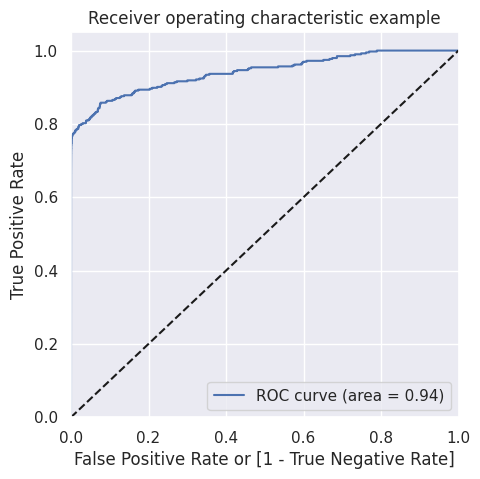

In [49]:
# Plot the ROC curve
draw_roc(Y_train, y_train_pred_proba)

**Prediction on the test set**

In [50]:
# Prediction on the test set
y_test_pred = logistic_imb_model.predict(X_test)

In [51]:
# Confusion matrix
confusion = metrics.confusion_matrix(Y_test, y_test_pred)
print(confusion)

[[46327 10537]
 [   21    77]]


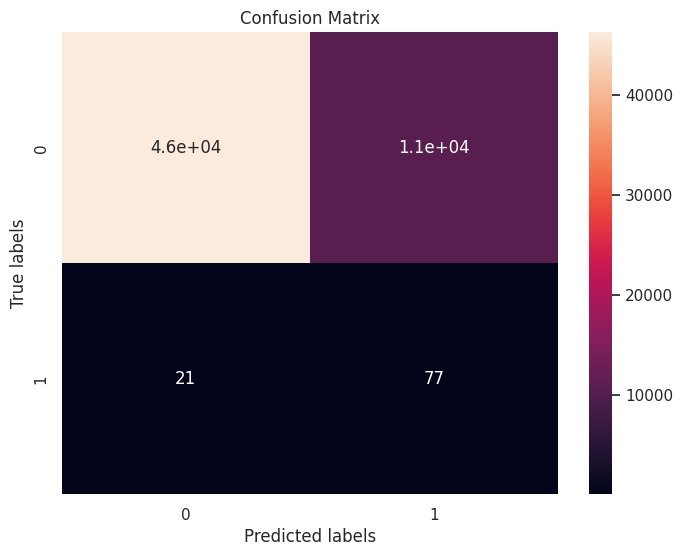

In [53]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [54]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [55]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(Y_test, y_test_pred))

# Sensitivity
print("Recall:-",TP / float(TP+FN))

# Specificity
print("Precision:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(Y_test, y_test_pred))

Accuracy:- 0.8146483620659387
Sensitivity:- 0.7857142857142857
Specificity:- 0.8146982273494654
F1-Score:- 0.014376400298730396


In [56]:
# classification_report
print(classification_report(Y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.81      0.90     56864
           1       0.01      0.79      0.01        98

    accuracy                           0.81     56962
   macro avg       0.50      0.80      0.46     56962
weighted avg       1.00      0.81      0.90     56962



**ROC on the test set**

In [57]:
# Predicted probability
y_test_pred_proba = logistic_imb_model.predict_proba(X_test)[:,1]

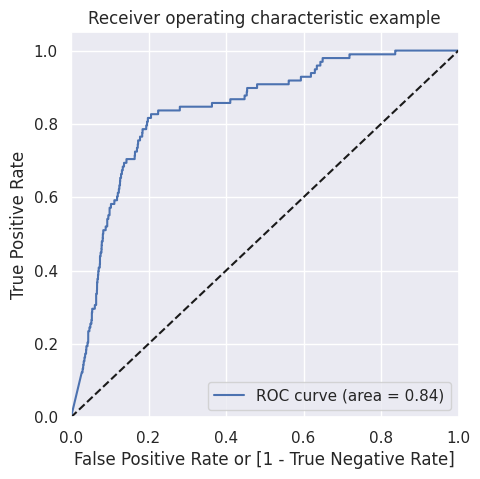

In [58]:
# Plot the ROC curve
draw_roc(Y_test, y_test_pred_proba)

## Random forest

In [59]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [60]:
# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_values = {'n_estimators':[80,  100], 'max_depth':[5, 7]}
grid_search = GridSearchCV(rf, param_grid = grid_values, scoring = 'roc_auc', cv=2)

# Fit the model
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 7], 'n_estimators': [80, 100]},
             scoring='roc_auc')

In [61]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9729565147493713 using {'max_depth': 7, 'n_estimators': 100}


In [62]:
# model with the best hyperparameters

rfc_imb_model = RandomForestClassifier(max_depth=7,n_estimators=100)

In [63]:
# Fit the model
rfc_imb_model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=7)

**Prediction on the train set**

In [64]:
# Predictions on the train set
y_train_pred = rfc_imb_model.predict(X_train)

In [82]:
# Confusion matrix
confusion = metrics.confusion_matrix(Y_train, Y_train)
print(confusion)

[[227451      0]
 [     0    394]]


[[227446      5]
 [    76    318]]


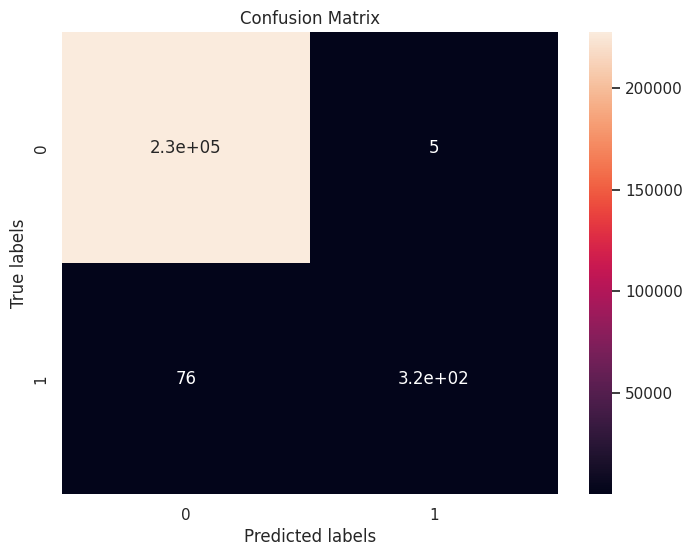

In [83]:
confusion = metrics.confusion_matrix(Y_train, y_train_pred)
print(confusion)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [66]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [67]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(Y_train, y_train_pred))

# Sensitivity
print("Recall:-",TP / float(TP+FN))

# Specificity
print("Precision:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(Y_train, y_train_pred))

Accuracy:- 0.9996444951611841
Recall:- 1.0
Precision:- 1.0
F1-Score:- 0.8870292887029289


In [68]:
# classification_report
print(classification_report(Y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.98      0.81      0.89       394

    accuracy                           1.00    227845
   macro avg       0.99      0.90      0.94    227845
weighted avg       1.00      1.00      1.00    227845



In [69]:
# Predicted probability
y_train_pred_proba = rfc_imb_model.predict_proba(X_train)[:,1]

In [70]:
# roc_auc
auc = metrics.roc_auc_score(Y_train, y_train_pred_proba)
auc

0.9875266155948087

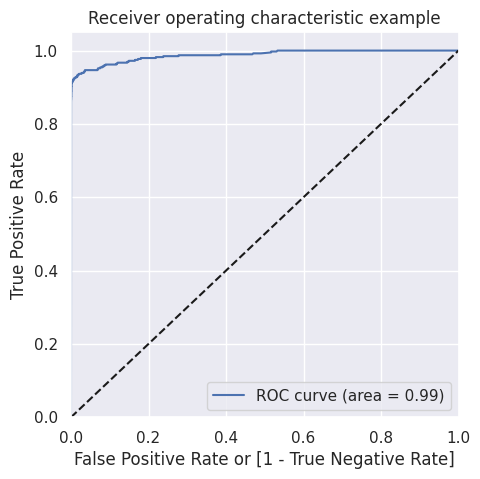

In [71]:
# Plot the ROC curve
draw_roc(Y_train, y_train_pred_proba)

**Prediction on the test set**

In [72]:
# Predictions on the test set
y_test_pred = rfc_imb_model.predict(X_test)

In [84]:
# Confusion matrix
confusion = metrics.confusion_matrix(Y_test, y_test_pred)
print(confusion)

[[56861     3]
 [   30    68]]


[[227446      5]
 [    76    318]]


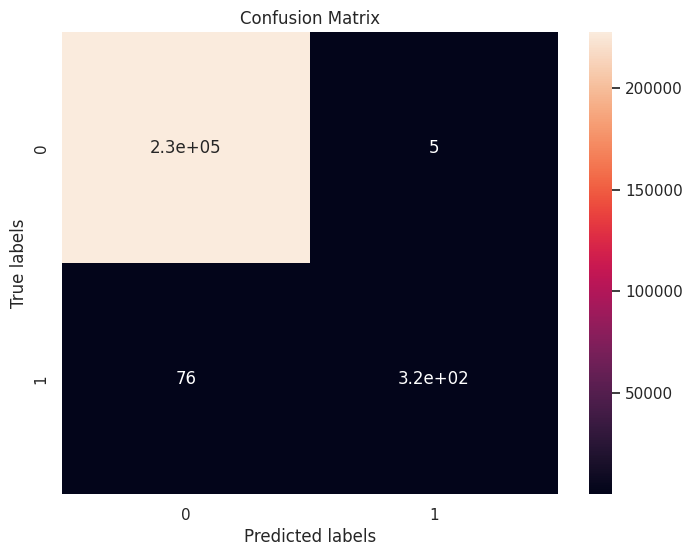

In [85]:
confusion = metrics.confusion_matrix(Y_train, y_train_pred)
print(confusion)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [74]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [75]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(Y_test, y_test_pred))

# Sensitivity
print("Recall:-",TP / float(TP+FN))

# Specificity
print("Precision:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(Y_train, y_train_pred))

Accuracy:- 0.999420666409185
Recall:- 0.6938775510204082
Precision:- 0.9999472425436128
F1-Score:- 0.8870292887029289


In [76]:
# classification_report
print(classification_report(Y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.69      0.80        98

    accuracy                           1.00     56962
   macro avg       0.98      0.85      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [77]:
# Predicted probability
y_test_pred_proba = rfc_imb_model.predict_proba(X_test)[:,1]

In [78]:
# roc_auc
auc = metrics.roc_auc_score(Y_test, y_test_pred_proba)
auc

0.9591584611475429

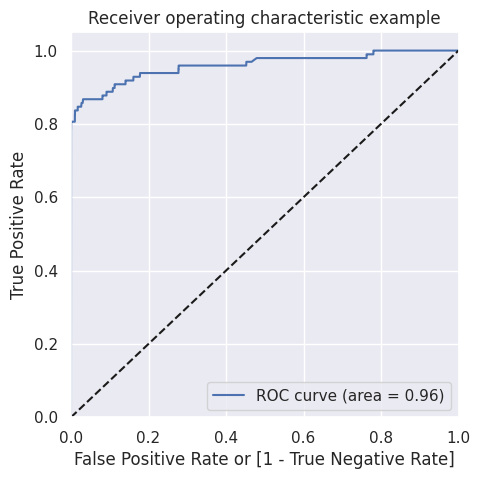

In [79]:
# Plot the ROC curve
draw_roc(Y_test, y_test_pred_proba)

In [80]:
features = X_train.columns
importances = rfc_imb_model.feature_importances_
indices = np.argsort(importances)

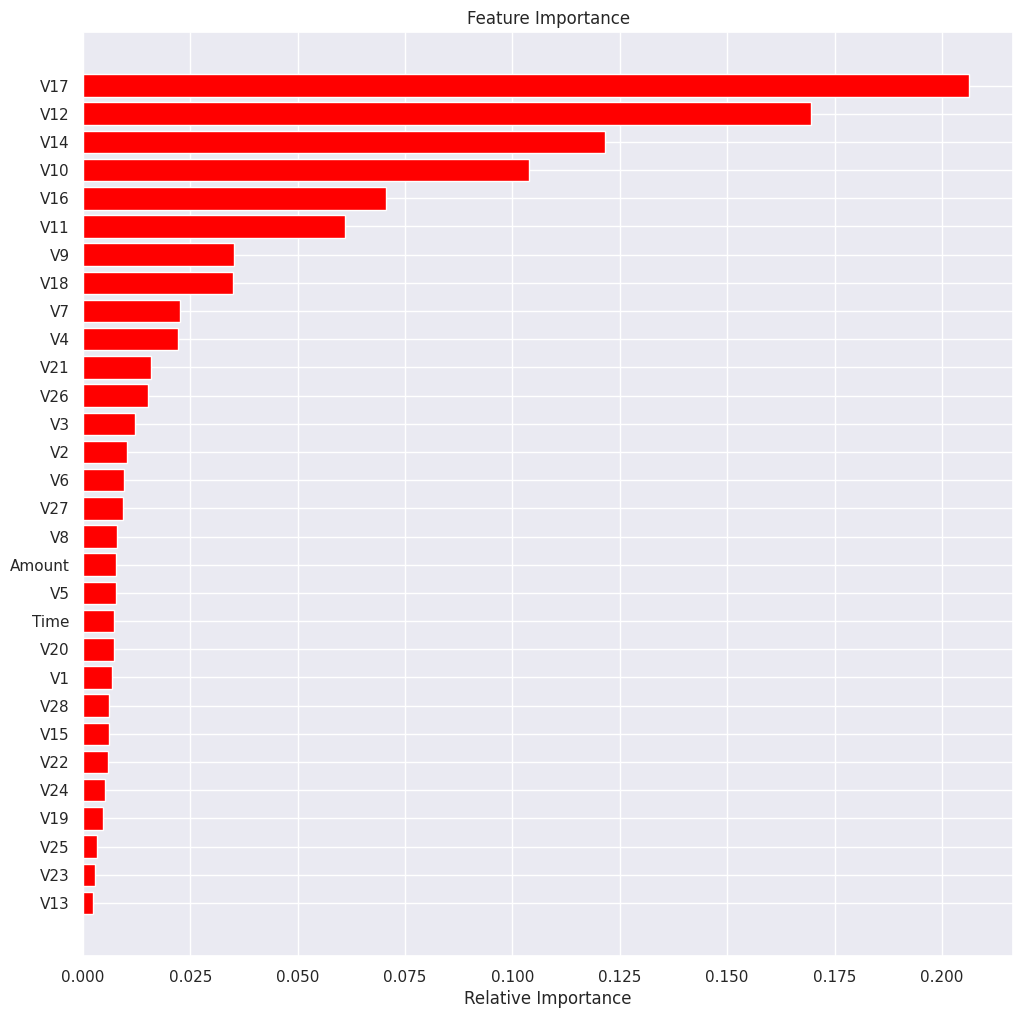

In [81]:
# Plotting of features by importance
plt.figure(figsize = (12, 12))
plt.title('Feature Importance')

plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()